In [1]:
#Testing of Normality of a given data

# Shapiro-Wilk Test
import pandas as pd
import numpy as np
import random as random
from scipy.stats import shapiro ,norm 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
df2 = pd.read_csv('ac.csv', names = ['thickness(mm)' , 'x', 'N1','N2','N3', 'N','lnN','lnN1', 'lnN2', 'lnN3', 'SE ']) # for standard error(SE) , we can do STDEV(B1:B10)/SQRT(COUNT(B1:B10)) in excell.
df2.head() #showing practical data of \\"Gamma absorption coefficient using GM counter"

,thickness(mm),x,N1,N2,N3,N,lnN,lnN1,lnN2,lnN3,SE
1,0.05,0.135,428,416,414,419.333333,6.038666,6.059123,6.030685,6.025866,0.017972
2,0.10,0.270,380,370,367,372.333333,5.919790,5.940171,5.913503,5.905362,0.018208
3,0.15,0.405,280,278,274,277.333333,5.625220,5.634790,5.627621,5.613128,0.011035
4,0.20,0.540,245,238,237,240.000000,5.480639,5.501258,5.472271,5.468060,0.018074
5,0.25,0.675,197,187,189,191.000000,5.252273,5.283204,5.231109,5.241747,0.027525


In [2]:
df = df2.drop(['lnN1', 'lnN2' ,'lnN3'], axis = 1)         # Deleting columns 
df

,thickness(mm),x,N1,N2,N3,N,lnN,SE
1,0.05,0.135,428,416,414,419.333333,6.038666,0.017972
2,0.10,0.270,380,370,367,372.333333,5.919790,0.018208
3,0.15,0.405,280,278,274,277.333333,5.625220,0.011035
4,0.20,0.540,245,238,237,240.000000,5.480639,0.018074
5,0.25,0.675,197,187,189,191.000000,5.252273,0.027525
6,0.30,0.810,160,154,155,156.333333,5.051990,0.020456
7,0.35,0.945,177,177,175,176.333333,5.172376,0.006561
8,0.40,1.080,148,144,141,144.333333,4.972125,0.024295
9,0.55,1.485,144,140,139,141.000000,4.948760,0.018681
10,0.95,2.565,138,133,134,135.000000,4.905275,0.019507


In [3]:
# normality test
stat, p = shapiro(df2.lnN)
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.893, p=0.183


# Since the p value is greater than 0.05 , we can say that the given distribution is  normal. 

In [4]:
f = df2.lnN
sd =f.std()
mu = f.mean()
a ,b = mu-3*sd, mu+3*sd
x = np.linspace(a,b,1000)
y = norm.pdf(x, loc = mu, scale = sd)

(array([2.64692328, 0.88230776, 0.88230776, 0.88230776, 0.        ,
        0.88230776, 0.88230776, 0.        , 0.88230776, 0.88230776]),
 array([4.90527478, 5.01861392, 5.13195305, 5.24529219, 5.35863133,
        5.47197046, 5.5853096 , 5.69864874, 5.81198787, 5.92532701,
        6.03866615]),
 <BarContainer object of 10 artists>)

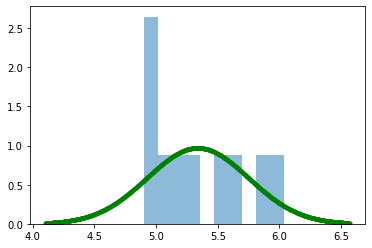

In [5]:


plt.plot(x,y,'.g')

plt.hist(f,alpha=.5, density = True) 

In [6]:
## QQ plot

In [7]:
import statsmodels.api as sm 
import pylab as py 

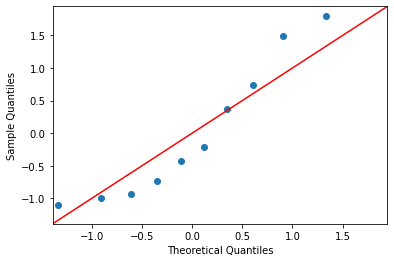

In [8]:
sm.qqplot(f, fit= True, line = "45") 
py.show() 

In [9]:
#Standard error  of the mean, standard deviation, mean 

In [10]:
from scipy.stats import sem 


In [11]:
sem(df2.lnN)


0.13001887423283032

In [12]:
np.std(df2.lnN) 

0.39005662269849095

In [13]:
np.mean(df2.lnN)

5.336711489359999

# Curve Fitting 

In [14]:
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

In [15]:
df2

,thickness(mm),x,N1,N2,N3,N,lnN,lnN1,lnN2,lnN3,SE
1,0.05,0.135,428,416,414,419.333333,6.038666,6.059123,6.030685,6.025866,0.017972
2,0.10,0.270,380,370,367,372.333333,5.919790,5.940171,5.913503,5.905362,0.018208
3,0.15,0.405,280,278,274,277.333333,5.625220,5.634790,5.627621,5.613128,0.011035
4,0.20,0.540,245,238,237,240.000000,5.480639,5.501258,5.472271,5.468060,0.018074
5,0.25,0.675,197,187,189,191.000000,5.252273,5.283204,5.231109,5.241747,0.027525
6,0.30,0.810,160,154,155,156.333333,5.051990,5.075174,5.036953,5.043425,0.020456
7,0.35,0.945,177,177,175,176.333333,5.172376,5.176150,5.176150,5.164786,0.006561
8,0.40,1.080,148,144,141,144.333333,4.972125,4.997212,4.969813,4.948760,0.024295
9,0.55,1.485,144,140,139,141.000000,4.948760,4.969813,4.941642,4.934474,0.018681
10,0.95,2.565,138,133,134,135.000000,4.905275,4.927254,4.890349,4.897840,0.019507


-280.8146964855893
317.9688498402246


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


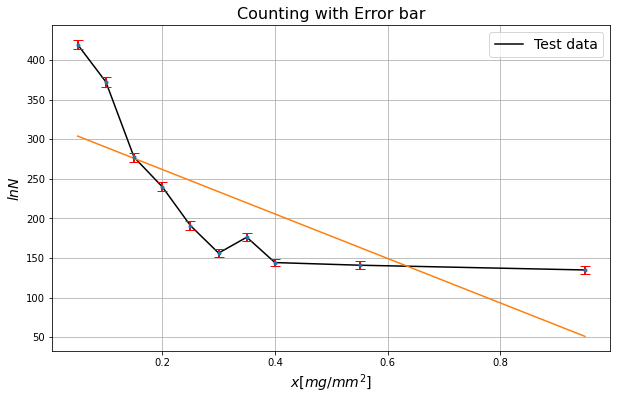

In [16]:

data = np.loadtxt("ac.csv",delimiter = ',')
#data = np.loadtxt("test4multiplot.txt", dtype = str)     #if file contains multiple data types
#data

x = data[:,1]
y = data[:,6]
# print(x)
yerror = data[:,10]
#plot data
plt.figure(figsize = [10,6])
plt.plot(x,y,"-", color = "black", label = "Test data")
plt.errorbar(x,y, yerr = yerror,ecolor = 'red', elinewidth =2,capsize =5, fmt = '.')
m , b = np.polyfit(x,y,1)
print(m)  # m = slpoe and b = intercept
print(b)

plt.plot(x,m*x+b)

plt.title("Counting with Error bar", fontsize=16)
plt.xlabel('$x[mg/mm^2]$', fontsize=14)
plt.ylabel('$ ln N $', fontsize=14)
plt.legend(fontsize=14)
plt.grid(True) # comment this if u do not need grid
plt.savefig("Decay.eps")

plt.show()

# Confidence interval 

In [17]:


import scipy.stats as st


In [18]:
y = data[:,6] 
st.t.interval(alpha=0.95, df=len(y)-1, loc=np.mean(y),scale=st.sem(y))

(152.841058338916, 297.758941661044)

In [19]:
def lin_fun(x,a1,a2):
    return a1*x + a2
def cos_fun(x,a3,a4,a5,a6):
    return a3*np.cos(x+a4)*np.exp(-x*a5) + a6

def exp_fun(x,a7,a8,a9):
    return a7*np.exp(-a8*x) + a9


[-280.81469903  317.96885048]
[[ 8581.0075473  -2831.73248555]
 [-2831.73248555  1471.64277927]]
a1 =  -280.814699030771 +- 92.63372791427274
a2 =  317.9688504819797 +- 38.36199654953256


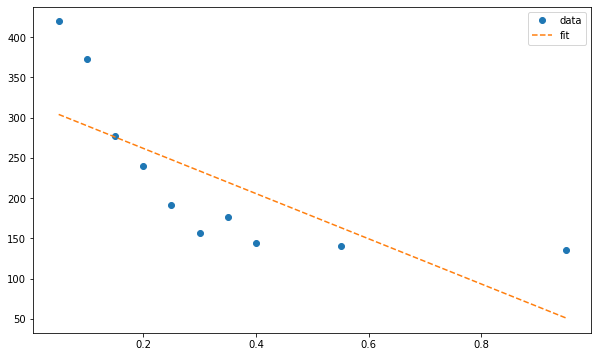

In [20]:
#curve_fit to find best fit parameters using a least square fit.
popt,pcov = curve_fit(lin_fun,x,y)
p1,p2 = popt
print(popt)
print(pcov)
print("a1 = ", popt[0], "+-", pcov[0,0]**0.5)
print("a2 = ", popt[1], "+-", pcov[1,1]**0.5)

#x1_fit = np.arange(min(x1),max(x1),1)
#x1_fit = np.arange(min(x),max(x)+1.0,1)
y1_fit = lin_fun(x, p1, p2)

plt.figure(figsize = [10,6])
plt.plot(x,y,"o", label = "data")
plt.plot(x,y1_fit,"--", label = "fit")
plt.legend()

In [21]:
from numpy import cov
from scipy.stats import pearsonr

In [22]:
covariance = cov(x,y)
print(covariance)
corr , _ = pearsonr(x,y)
print("Pearson correlation : %.3f" %corr)
# t test for the population correlation coeffient 


[[ 6.95555556e-02 -1.95322222e+01]
 [-1.95322222e+01  1.02597889e+04]]
Pearson correlation : -0.731


# High level of correlation(nearly equal to -1) i.e. greater than 0.5 and a negative correlation. 

In [23]:
# t-test for dependent samples
from math import sqrt
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from scipy.stats import t
 
# function for calculating the t-test for two dependent samples
def dependent_ttest(x, y, alpha):
	# calculate means
	mean1, mean2 = mean(x), mean(y)
	# number of paired samples
	n = len(x)
	# sum squared difference between observations
	d1 = sum([(x[i]-y[i])**2 for i in range(n)])
	# sum difference between observations
	d2 = sum([x[i]-y[i] for i in range(n)])
	# standard deviation of the difference between means
	sd = sqrt((d1 - (d2**2 / n)) / (n - 1))
	# standard error of the difference between the means
	sed = sd / sqrt(n)
	# calculate the t statistic
	t_stat = (mean1 - mean2) / sed
	# degrees of freedom
	df = n - 1
	# calculate the critical value
	cv = t.ppf(1.0 - alpha, df)
	# calculate the p-value
	p = (1.0 - t.cdf(abs(t_stat), df)) * 2.0
	# return everything
	return t_stat, df, cv, p
 

# calculate the t test
alpha = 0.05
t_stat, df, cv, p = dependent_ttest(x, y, alpha)
print('t=%.3f, df=%d, cv=%.3f, p=%.3f' % (t_stat, df, cv, p))
# interpret via critical value
if abs(t_stat) <= cv:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

t=-7.010, df=9, cv=1.833, p=0.000
Reject the null hypothesis that the means are equal.
Reject the null hypothesis that the means are equal.


In [24]:
# calculate the critical value
alpha = 0.05
cv = t.ppf(1.0 - alpha, df) 


In [25]:
# interpret via p-value
if p > alpha:
	print('Accept null hypothesis that the means are equal.')
else:
	print('Reject the null hypothesis that the means are equal.')

Reject the null hypothesis that the means are equal.


In [26]:
#np.cov(data)
# correlation between x and y
# t test
# result significance from p value

In [27]:
# https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html

In [28]:
# https://github.com/dharmapaudel 